# Replicating Probublicas COMPAS Audit

## Why COMPAS?


## Propublica started the COMPAS Debate with the article [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencin). With their article, they also released details of their methodology and their [data and code](https://github.com/propublica/compas-analysis). This presents a real data set that can be used for research on how data is used in a criminal justice setting without researchers having to perform their own requests for information, so it has been used and reused a lot of times.





In [11]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [14]:
# use the raw button on github to get the compatible url
df_pp = pd.read_csv("https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv",
         header=0).set_index('id')

In [15]:
df_pp.head()


name   first         last compas_screening_date   sex  \
id                                                                        
1     miguel hernandez  miguel    hernandez            2013-08-14  Male   
3          kevon dixon   kevon        dixon            2013-01-27  Male   
4             ed philo      ed        philo            2013-04-14  Male   
5          marcu brown   marcu        brown            2013-01-13  Male   
6   bouthy pierrelouis  bouthy  pierrelouis            2013-03-26  Male   

           dob  age          age_cat              race  juv_fel_count  ...  \
id                                                                     ...   
1   1947-04-18   69  Greater than 45             Other              0  ...   
3   1982-01-22   34          25 - 45  African-American              0  ...   
4   1991-05-14   24     Less than 25  African-American              0  ...   
5   1993-01-21   23     Less than 25  African-American              0  ...   
6   1973-01-22   43          25 - 45             Other              0  ...   

    v_decile_score  v_score_text  v_screening_date  in_custody  out_custody  \
id                                                                            
1                1           Low        2013-08-14  2014-07-07   2014-07-14   
3                1           Low        2013-01-27  2013-01-26   2013-02-05   
4                3           Low        2013-04-14  2013-06-16   2013-06-16   
5                6        Medium        2013-01-13         NaN          NaN   
6                1           Low        2013-03-26         NaN          NaN   

   priors_count.1 start   end event two_year_recid  
id                                                  
1               0     0   327     0              0  
3               0     9   159     1              1  
4               4     0    63     0              1  
5               1     0  1174     0              0  
6               2     0  1102     0              0  

[5 rows x 52 columns]

In [16]:
df_pp.tail()


name      first       last compas_screening_date  \
id                                                                       
10996        steven butler     steven     butler            2013-11-23   
10997      malcolm simmons    malcolm    simmons            2014-02-01   
10999      winston gregory    winston    gregory            2014-01-14   
11000          farrah jean     farrah       jean            2014-03-09   
11001  florencia sanmartin  florencia  sanmartin            2014-06-30   

          sex         dob  age          age_cat              race  \
id                                                                  
10996    Male  1992-07-17   23     Less than 25  African-American   
10997    Male  1993-03-25   23     Less than 25  African-American   
10999    Male  1958-10-01   57  Greater than 45             Other   
11000  Female  1982-11-17   33          25 - 45  African-American   
11001  Female  1992-12-18   23     Less than 25          Hispanic   

       juv_fel_count  ...  v_decile_score  v_score_text  v_screening_date  \
id                    ...                                                   
10996              0  ...               5        Medium        2013-11-23   
10997              0  ...               5        Medium        2014-02-01   
10999              0  ...               1           Low        2014-01-14   
11000              0  ...               2           Low        2014-03-09   
11001              0  ...               4           Low        2014-06-30   

       in_custody  out_custody priors_count.1 start  end event two_year_recid  
id                                                                             
10996  2013-11-22   2013-11-24              0     1  860     0              0  
10997  2014-01-31   2014-02-02              0     1  790     0              0  
10999  2014-01-13   2014-01-14              0     0  808     0              0  
11000  2014-03-08   2014-03-09              3     0  754     0              0  
11001  2015-03-15   2015-03-15              2     0  258     0              1  

[5 rows x 52 columns]

In [17]:
df_pp.shape

(7214, 52)

In [18]:
df = pd.clean('https://raw.githubusercontent.com/ml4sts/outreach-compas/main/data/compas_c.csv')

AttributeError: module 'pandas' has no attribute 'clean'

In [19]:
df = pd.read('https://raw.githubusercontent.com/ml4sts/outreach-compas/main/data/compas_c.csv')

AttributeError: module 'pandas' has no attribute 'read'

In [20]:
df = pd.panda('https://raw.githubusercontent.com/ml4sts/outreach-compas/main/data/compas_c.csv')

AttributeError: module 'pandas' has no attribute 'panda'

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/ml4sts/outreach-compas/main/data/compas_c.csv')

In [22]:
df_pp.head()

name   first         last compas_screening_date   sex  \
id                                                                        
1     miguel hernandez  miguel    hernandez            2013-08-14  Male   
3          kevon dixon   kevon        dixon            2013-01-27  Male   
4             ed philo      ed        philo            2013-04-14  Male   
5          marcu brown   marcu        brown            2013-01-13  Male   
6   bouthy pierrelouis  bouthy  pierrelouis            2013-03-26  Male   

           dob  age          age_cat              race  juv_fel_count  ...  \
id                                                                     ...   
1   1947-04-18   69  Greater than 45             Other              0  ...   
3   1982-01-22   34          25 - 45  African-American              0  ...   
4   1991-05-14   24     Less than 25  African-American              0  ...   
5   1993-01-21   23     Less than 25  African-American              0  ...   
6   1973-01-22   43          25 - 45             Other              0  ...   

    v_decile_score  v_score_text  v_screening_date  in_custody  out_custody  \
id                                                                            
1                1           Low        2013-08-14  2014-07-07   2014-07-14   
3                1           Low        2013-01-27  2013-01-26   2013-02-05   
4                3           Low        2013-04-14  2013-06-16   2013-06-16   
5                6        Medium        2013-01-13         NaN          NaN   
6                1           Low        2013-03-26         NaN          NaN   

   priors_count.1 start   end event two_year_recid  
id                                                  
1               0     0   327     0              0  
3               0     9   159     1              1  
4               4     0    63     0              1  
5               1     0  1174     0              0  
6               2     0  1102     0              0  

[5 rows x 52 columns]

In [23]:
df.shape

(5278, 15)

In [24]:
df['race'].value_counts()

African-American    3175
Caucasian           2103
Name: race, dtype: int64

In [25]:
df['sex'].value_counts()

Male      4247
Female    1031
Name: sex, dtype: int64

In [26]:
df['age_cat'].value_counts()

25 - 45            3026
Less than 25       1156
Greater than 45    1096
Name: age_cat, dtype: int64

In [27]:
race_score_table = df.groupby(['race','decile_score']).size().reset_index().pivot(
                index='decile_score',columns='race',values=0)

# percentage of defendants in each score category
(100*race_score_table/race_score_table.sum()).transpose()

decile_score             1          2          3          4          5   \
race                                                                      
African-American  11.496063  10.897638   9.385827  10.614173  10.173228   
Caucasian         28.768426  15.263909  11.317166  11.554922   9.510223   

decile_score             6          7         8         9         10  
race                                                                  
African-American  10.015748  10.803150  9.480315  9.984252  7.149606  
Caucasian          7.608179   5.373276  4.564907  3.661436  2.377556

In [28]:
race_score_table.plot(figsize(12,7))

NameError: name 'figsize' is not defined

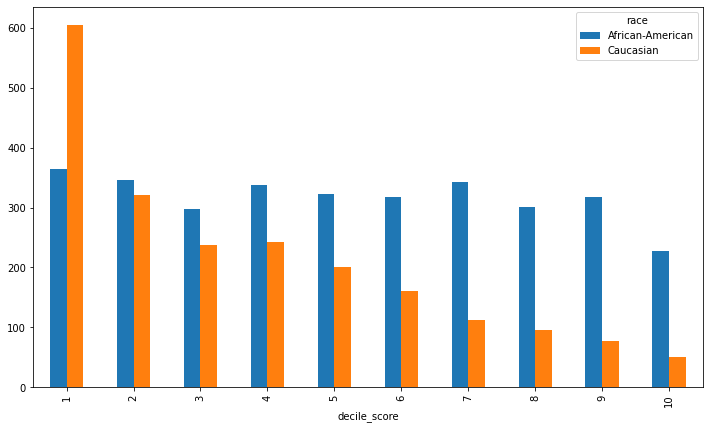

In [30]:
race_score_table.plot(kind='bar',figsize=(12,7))

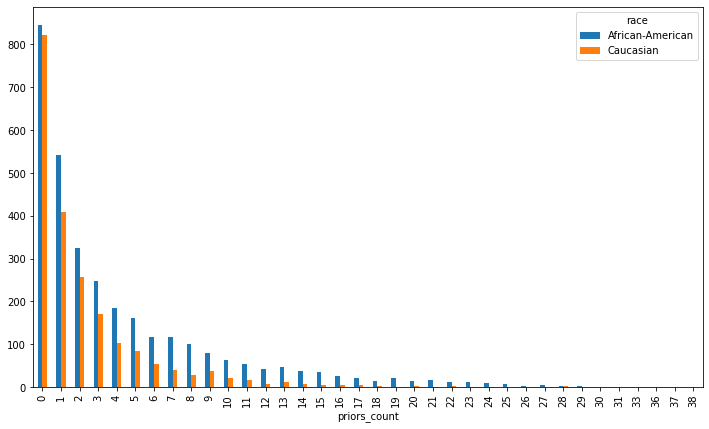

In [31]:
priors = df.groupby(['race','priors_count']).size().reset_index().pivot(index='priors_count',columns='race',values=0)
priors.plot(kind='bar',figsize=[12,7])

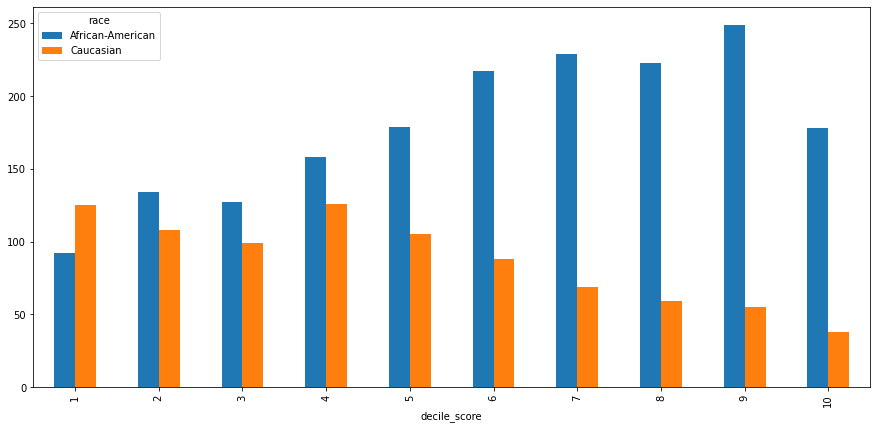

In [32]:
df_2priors = df.loc[df['priors_count']>=2]
score_2priors = df_2priors.groupby(['race','decile_score']).size().reset_index().pivot(
  index='decile_score',columns='race',values=0)
score_2priors.plot(kind='bar',figsize=[15,7])

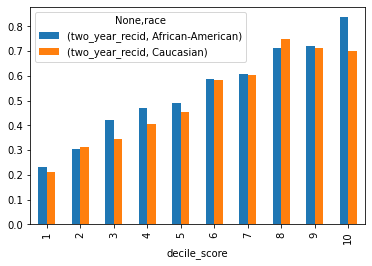

In [33]:
df.groupby(['race','decile_score'])['two_year_recid'].mean().reset_index().pivot(
  index='decile_score',columns='race').plot(kind='bar')


In [34]:
dfQ = pd.read_csv('https://raw.githubusercontent.com/ml4sts/outreach-compas/main/data/compas_cq.csv')


In [35]:
dfQ.head()

id  age c_charge_degree              race       age_cat  score_text  \
0   3   34               F  African-American      25 to 45           0   
1   4   24               F  African-American  Less than 25           0   
2   8   41               F         Caucasian      25 to 45           1   
3  10   39               M         Caucasian      25 to 45           0   
4  14   27               F         Caucasian      25 to 45           0   

      sex priors_count  days_b_screening_arrest  decile_score  is_recid  \
0    Male            0                     -1.0             3         1   
1    Male  More than 3                     -1.0             4         1   
2    Male  More than 3                     -1.0             6         1   
3  Female            0                     -1.0             1         0   
4    Male            0                     -1.0             4         0   

   two_year_recid            c_jail_in           c_jail_out length_of_stay  
0               1  2013-01-26 03:45:27  2013-02-05 05:36:53       <3months  
1               1  2013-04-13 04:58:34  2013-04-14 07:02:04          <week  
2               1  2014-02-18 05:08:24  2014-02-24 12:18:30          <week  
3               0  2014-03-15 05:35:34  2014-03-18 04:28:46          <week  
4               0  2013-11-25 06:31:06  2013-11-26 08:26:57          <week

In [36]:
# measure with high-low score
dfQ[['two_year_recid','score_text']].corr()

two_year_recid  score_text
two_year_recid        1.000000    0.314698
score_text            0.314698    1.000000

In [37]:
dfQ[['two_year_recid','decile_score']].corr()

two_year_recid  decile_score
two_year_recid        1.000000      0.368193
decile_score          0.368193      1.000000

In [38]:
# Let's measure the disparate impact according to the EEOC rule
means_score = dfQ.groupby(['score_text','race']).size().unstack().reset_index()
means_score = means_score/means_score.sum()
means_score

race  score_text  African-American  Caucasian
0            0.0          0.423937   0.669044
1            1.0          0.576063   0.330956

In [42]:
# compute disparate impact
AA_with_high_score = means_score.loc[1,'African-American']
C_with_high_score = means_score.loc[1,'Caucasian']

disparate_impact_compas = means_score = AA_with_high_score/C_with_high_score

In [43]:
disparate_impact_compas

1.740604127070323

In [44]:
# compute disparate impact
AA_with_high_score = means_score.loc[1,'African-American']
C_with_high_score = means_score.loc[1,'Caucasian']

disparate_impact_compas = means_score = C_with_high_score/AA_with_high_score


AttributeError: 'numpy.float64' object has no attribute 'loc'

In [45]:
# compute disparate impact
AA_with_high_score = means_score.loc[1,'African-American']
C_with_high_score = means_score.loc[1,'Caucasian']

disparate_impact_compas = means_score = C_with_high_score/AA_with_high_score

AttributeError: 'numpy.float64' object has no attribute 'loc'

In [46]:
# Let's measure the disparate impact according to the EEOC rule
means_score = dfQ.groupby(['score_text','race']).size().unstack().reset_index()
means_score = means_score/means_score.sum()
means_score


race  score_text  African-American  Caucasian
0            0.0          0.423937   0.669044
1            1.0          0.576063   0.330956

In [47]:
# compute disparate impact
AA_with_high_score = means_score.loc[1,'African-American']
C_with_high_score = means_score.loc[1,'Caucasian']

disparate_impact_compas = means_score = C_with_high_score/AA_with_high_score

In [48]:
disparate_impact_compas


0.5745131730114521